In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder
from statsmodels.miscmodels.ordinal_model import OrderedModel
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.multitest import multipletests
from scipy.stats import chi2_contingency



In [69]:
# Define the file path
file_path = 'Dataset Obesity Raw.csv'

In [73]:
# Load the dataset from the Excel file
data = pd.read_csv(file_path)

# Display the dataset
print(data)

      Gender  Age Family History with Overweight  How many main meals  \
0     Female   21                            yes                    3   
1     Female   21                            yes                    3   
2       Male   23                            yes                    3   
3       Male   27                             no                    3   
4       Male   22                             no                    1   
...      ...  ...                            ...                  ...   
2105  Female   20                            yes                    3   
2106  Female   21                            yes                    3   
2107  Female   22                            yes                    3   
2108  Female   24                            yes                    3   
2109  Female   23                            yes                    3   

     Eat Between Meals Drinking water Technological Devices  \
0            Sometimes         Medium                  More 

In [72]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display missing values
print("\nMissing values in the dataset:")
print(missing_values)


Missing values in the dataset:
Gender                            0
Age                               0
Family History with Overweight    0
How many main meals               0
Eat Between Meals                 0
Drinking water                    0
Technological Devices             0
Usually Transportation Type       0
Obesity Levels                    0
dtype: int64


In [74]:
# Encode categorical variables
label_encoder = LabelEncoder()

In [75]:
# Display the encoded data
print("\nEncoded Data:")
print(data.head())


Encoded Data:
   Gender  Age Family History with Overweight  How many main meals  \
0  Female   21                            yes                    3   
1  Female   21                            yes                    3   
2    Male   23                            yes                    3   
3    Male   27                             no                    3   
4    Male   22                             no                    1   

  Eat Between Meals Drinking water Technological Devices  \
0         Sometimes         Medium                  More   
1         Sometimes           More                   Low   
2         Sometimes         Medium                Medium   
3         Sometimes         Medium                   Low   
4         Sometimes         Medium                   Low   

  Usually Transportation Type Obesity Levels  
0       Public_Transportation  Normal_Weight  
1       Public_Transportation  Normal_Weight  
2       Public_Transportation  Normal_Weight  
3              

In [76]:
# Encode the target variable 'Obesity Levels'
data['Obesity Levels'] = label_encoder.fit_transform(data['Obesity Levels'])

In [77]:
# List of categorical variables to encode
categorical_vars = ['Gender', 'Family History with Overweight', 'Eat Between Meals', 'Drinking water', 'Technological Devices', 'Usually Transportation Type']


In [78]:
# Encode the categorical variables
for var in categorical_vars:
    data[var] = label_encoder.fit_transform(data[var])


In [79]:
# Define the independent variables (X) and the dependent variable (y)
X = data.drop(columns=['Obesity Levels'])
y = data['Obesity Levels']

# 1. Ordinal Logistic Regression

In [80]:
# Fit the ordinal logit model
model = OrderedModel(y, X, distr='logit')
result = model.fit(method='bfgs')

# Display the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.614588
         Iterations: 43
         Function evaluations: 47
         Gradient evaluations: 47
                             OrderedModel Results                             
Dep. Variable:         Obesity Levels   Log-Likelihood:                -3406.8
Model:                   OrderedModel   AIC:                             6840.
Method:            Maximum Likelihood   BIC:                             6913.
Date:                Fri, 30 Aug 2024                                         
Time:                        16:43:30                                         
No. Observations:                2110                                         
Df Residuals:                    2097                                         
Df Model:                           8                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------

In [81]:
# Compute odds ratios
params = result.params
odds_ratios = np.exp(params)

# Create a DataFrame for better visualization
odds_ratios_df = pd.DataFrame({
    'Factor': odds_ratios.index,
    'Odds Ratio': odds_ratios.values
})

# Print the odds ratios
print("\nOdds Ratios:")
print(odds_ratios_df)


Odds Ratios:
                            Factor  Odds Ratio
0                           Gender    0.938883
1                              Age    1.048016
2   Family History with Overweight    4.673567
3              How many main meals    0.839259
4                Eat Between Meals    3.293258
5                   Drinking water    1.216131
6            Technological Devices    0.637700
7      Usually Transportation Type    1.067026
8                              0/1    6.635886
9                              1/2    1.290611
10                             2/3    1.056995
11                             3/4    0.742601
12                             4/5    0.607613


In [14]:
# Make predictions
predictions = result.predict(X)
predicted_classes = predictions.idxmax(axis=1)

# Calculate accuracy
accuracy = accuracy_score(y, predicted_classes)

# Calculate confusion matrix
#conf_matrix = confusion_matrix(y, predicted_classes)

# Calculate classification report
class_report = classification_report(y, predicted_classes, zero_division=0)

print("Accuracy:", accuracy)
#print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.3090047393364929
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.42      0.44       270
           1       0.44      0.31      0.36       301
           2       0.17      0.14      0.16       369
           3       0.00      0.00      0.00       337
           4       0.00      0.00      0.00       267
           5       0.29      0.69      0.41       566

    accuracy                           0.31      2110
   macro avg       0.23      0.26      0.23      2110
weighted avg       0.23      0.31      0.25      2110



# Assumptions Analysis of Ordinal Logistic Regression

# - Checking Multicollinearity

In [17]:
# 1. Check for multicollinearity using Variance Inflation Factor (VIF)
X_const = add_constant(X)
vif = pd.DataFrame()
vif["Variable"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print("\nVariance Inflation Factor (VIF) to check multicollinearity:")
print(vif)


Variance Inflation Factor (VIF) to check multicollinearity:
                         Variable        VIF
0                           const  56.724595
1                          Gender   1.088193
2                             Age   1.146815
3  Family History with Overweight   1.078639
4             How many main meals   1.033759
5               Eat Between Meals   1.089934
6                  Drinking water   1.064192
7           Technological Devices   1.096950
8     Usually Transportation Type   1.121958


# 2. Chi-Square Test

In [82]:
# Perform Chi-Square tests
chi2_results = {}
for column in X.columns:
    contingency_table = pd.crosstab(data[column], data['Obesity Levels'])
    chi2, p, dof, _ = chi2_contingency(contingency_table)
    chi2_results[column] = {'Chi-Square': chi2, 'P-Value': p, 'Degrees of Freedom': dof}

In [83]:
# Display results
results_df = pd.DataFrame(chi2_results).T
results_df = results_df.rename(columns={'chi2': 'Chi-Square', 'p_value': 'P-Value', 'dof': 'Degrees of Freedom'})

# Print the results
print("Chi-Square Test Results:")
print(results_df)

Chi-Square Test Results:
                                 Chi-Square        P-Value  Degrees of Freedom
Gender                           448.859240   8.656413e-95                 5.0
Age                             1434.466585  1.426335e-187               195.0
Family History with Overweight   586.954388  1.331733e-124                 5.0
How many main meals              428.693305   6.365996e-82                15.0
Eat Between Meals                693.752661  3.987654e-138                15.0
Drinking water                   113.333703   1.132907e-19                10.0
Technological Devices            267.005482   1.430062e-51                10.0
Usually Transportation Type      242.734102   3.320945e-40                20.0


# Assumptions Analysis of Chi-Square Test 

# - Cheking Expected Frequency of Behavioural Factors

In [84]:
# List of behavioral variables
behavioral_vars = [
    'How many main meals', 
    'Eat Between Meals', 
    'Drinking water', 
    'Technological Devices', 
    'Usually Transportation Type'
]

# Function to calculate expected frequencies
def calculate_expected_frequencies(data, column, target):
    contingency_table = pd.crosstab(data[column], data[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Convert expected frequencies to a DataFrame
    expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
    
    return expected_df

# Calculate and display expected frequencies for each behavioral variable
expected_freqs = {}
for column in behavioral_vars:
    expected_freqs[column] = calculate_expected_frequencies(data, column, 'Obesity Levels')
    print(f"Expected frequencies for '{column}':")
    print(expected_freqs[column])
    print("\n" + "-"*50 + "\n")

Expected frequencies for 'How many main meals':
Obesity Levels                0           1           2           3  \
How many main meals                                                   
1                     50.545024   56.348341   69.078199   63.087678   
2                     36.469194   40.656398   49.841232   45.518957   
3                    174.156398  194.152133  238.013744  217.372986   
4                      8.829384    9.843128   12.066825   11.020379   

Obesity Levels                4           5  
How many main meals                          
1                     49.983412  105.957346  
2                     36.063981   76.450237  
3                    172.221327  365.083412  
4                      8.731280   18.509005  

--------------------------------------------------

Expected frequencies for 'Eat Between Meals':
Obesity Levels              0           1           2           3           4  \
Eat Between Meals                                                    

# 3.Random Forest Calssifier

In [85]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [86]:
# Train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [87]:
# Get feature importances
feature_importances = rf_model.feature_importances_
features = X.columns

In [88]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

In [89]:
# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [90]:
# Display the feature importances
print("\nFeature Importances:")
print(importance_df)


Feature Importances:
                          Feature  Importance
1                             Age    0.356368
3             How many main meals    0.113464
5                  Drinking water    0.100448
0                          Gender    0.099914
4               Eat Between Meals    0.093319
7     Usually Transportation Type    0.085632
6           Technological Devices    0.079209
2  Family History with Overweight    0.071645


# Assumption Analysis of Random Forest

# - No Assumption of Multicollinerity

In [50]:
X_const = add_constant(X_train)  # Add a constant term for VIF calculation
vif = pd.DataFrame()
vif["Variable"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif)


Variance Inflation Factor (VIF):
                         Variable        VIF
0                           const  56.257450
1                          Gender   1.085476
2                             Age   1.153825
3  Family History with Overweight   1.100773
4             How many main meals   1.039608
5               Eat Between Meals   1.084278
6                  Drinking water   1.064456
7           Technological Devices   1.087985
8     Usually Transportation Type   1.127159


# - No Assumption of Linear Relationship

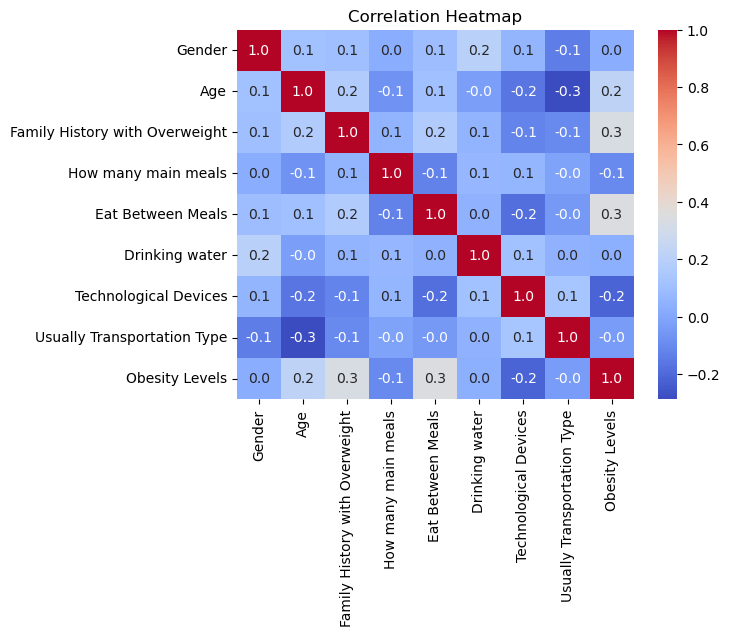

In [67]:
# Heatmap of correlations between variables
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()